In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Data Cleaning

In [4]:
df=pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

This tells us the dataset has no missing values, but upon inspection, we see several columns having "?" as values.

In [7]:
df["workclass"]=df["workclass"].replace("?",np.nan)
df["occupation"]=df["occupation"].replace("?",np.nan)
df["native.country"]=df["native.country"].replace("?",np.nan)

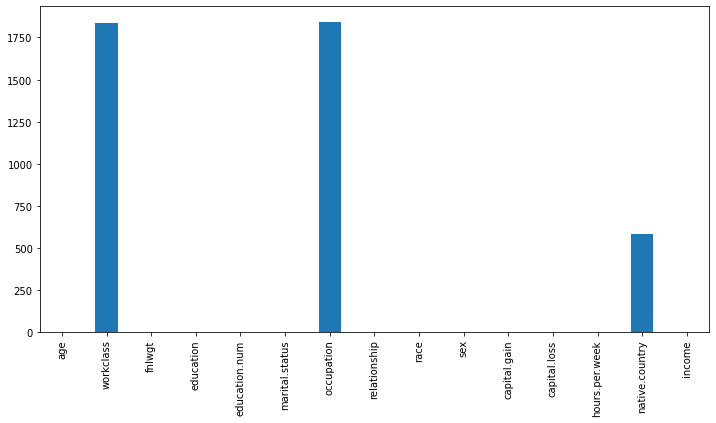

In [8]:
plt.figure(figsize = (12, 6))
df.isna().sum().plot.bar();

Let's see how much data we would lose if we just dropped the null values.

In [9]:
df2 = df.dropna()
percent_dropped = (df.shape[0] - df2.shape[0])/df.shape[0]*100
print(percent_dropped)

7.367709836921471


7% is significant so let's replace the values with the mode of each column

In [10]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"]=df["native.country"].fillna(df["native.country"].mode()[0])

We should also check for duplicates and only keep one of each unique value.

In [11]:
df.duplicated().sum()

24

In [12]:
df=df.drop_duplicates(keep="first")

In [13]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
cat_feats = df.select_dtypes(include=['object']); cat_feats.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [15]:
df = df.drop('education', axis=1);df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [16]:
income_mapper = {'<=50K':0,'>50K':1}
df['income'] = df['income'].map(income_mapper)
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [24]:
income_df=pd.get_dummies(df,columns=['workclass', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],drop_first=True)
income_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Feature Selection

In [3]:
income_df = pd.read_csv('income_numerical.csv', index_col=0)

In [5]:
income_df = income_df.drop('fnlwgt', axis=1)

In [6]:
income_df.columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative

(83, 83)


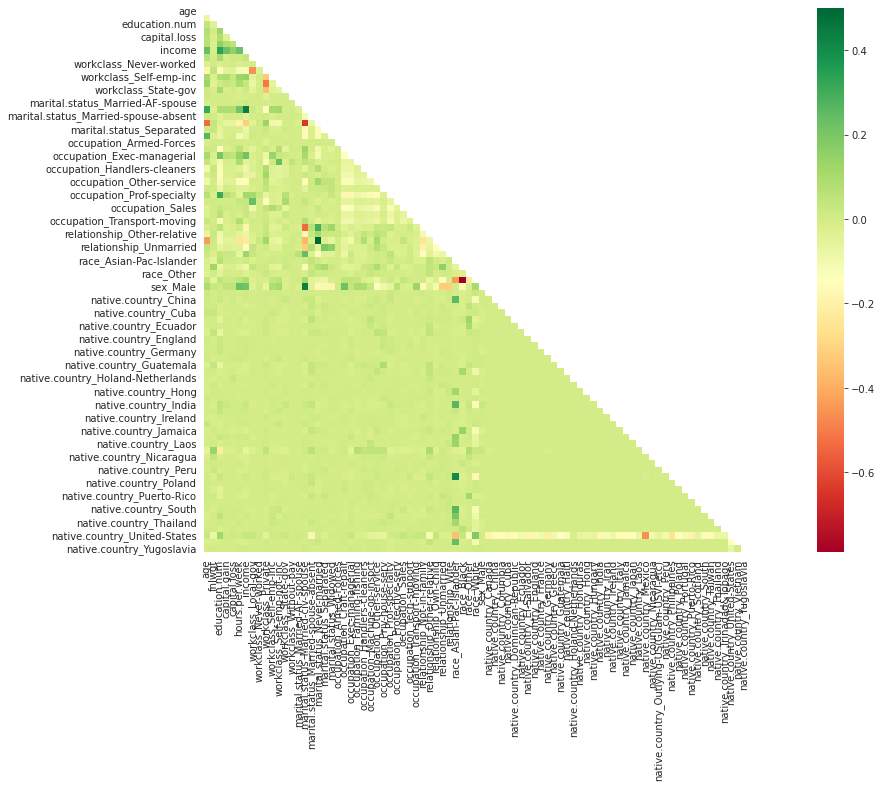

In [4]:
corr = income_df.corr()
print(corr.shape)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True, cmap='RdYlGn')
#plt.savefig('multi4.png')
plt.show()

In [5]:
X = income_df.drop('income', axis=1)
y = income_df['income']

In [6]:
from sklearn.ensemble import RandomForestClassifier
selector = RandomForestClassifier(random_state=42)

selector.fit(X, y)

RandomForestClassifier(random_state=42)

In [7]:
feature_imp = selector.feature_importances_

In [8]:
top10 = feature_imp.argsort()[::-1][:10]; top10

array([ 1,  0,  2,  3, 14,  5,  4, 16, 21, 32], dtype=int64)

In [9]:
cols = X.columns[top10]; cols

Index(['fnlwgt', 'age', 'education.num', 'capital.gain',
       'marital.status_Married-civ-spouse', 'hours.per.week', 'capital.loss',
       'marital.status_Never-married', 'occupation_Exec-managerial',
       'relationship_Not-in-family'],
      dtype='object')

In [10]:
feature_imp[top10]

array([0.17167652, 0.15626   , 0.11687979, 0.10118424, 0.08805931,
       0.08624354, 0.03321009, 0.03071571, 0.01873977, 0.01608286])

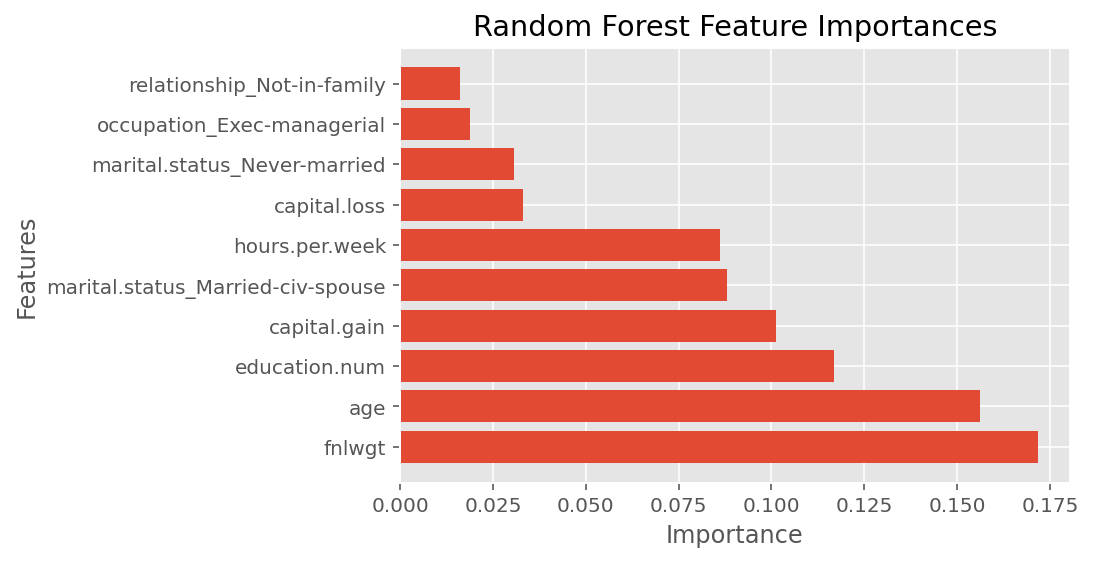

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
plot_imp(np.array(cols), feature_imp[top10], 'Random Forest')

In [12]:
cols = list(cols)
cols.append('income')

In [13]:
i_df = income_df[cols]

In [14]:
i_df

,fnlwgt,age,education.num,capital.gain,marital.status_Married-civ-spouse,hours.per.week,capital.loss,marital.status_Never-married,occupation_Exec-managerial,relationship_Not-in-family,income
0,77053,90,9,0,0,40,4356,0,0,1,0
1,132870,82,9,0,0,18,4356,0,1,1,0
2,186061,66,10,0,0,40,4356,0,0,0,0
3,140359,54,4,0,0,40,3900,0,0,0,0
4,264663,41,10,0,0,40,3900,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,310152,22,10,0,0,40,0,1,0,1,0
32557,257302,27,12,0,1,38,0,0,0,0,0
32558,154374,40,9,0,1,40,0,0,0,0,1
32559,151910,58,9,0,0,40,0,0,0,0,0


In [28]:
i_df.to_csv("df_preprocessed.csv")

# Naive Bayes

Naive Bayes works to fit a probabilistic distribution for every feature for every class and uses probabilities of individual samples to make a class prediction. The type of distribution can vary - Gaussian is the most common.
<br> According to Bayes Theorem:
$$ P(y_i | x_1, x_2, ... , x_n) = \frac{P(x_1, x_2, ... x_n| y_i)*P(y_i)}{P(x_1, x_2,... x_n)}$$ <br>
We can get rid of the denominator because it stays constant for all classes, so we can normalize by removing it. If we assume every feature is independent, we can come up with the naive assumption:
$$ P(y_i | x_1, x_2, ... , x_n) = P(x_1|y_i)*P(x_2|y_i)*...*P(x_n|y_i)*P(y_i)$$
<br>
We can then calculate the class probability for each test sample and select the class with the highest probability.

In [ ]:
import pickle

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [16]:
train_df, test_df = train_test_split(i_df, test_size=0.2, random_state=42,stratify=i_df['income'])

In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [8]:
train_df

,age,education.num,male,capital.gain,capital.loss,hours.per.week,native,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,42,9,0,0,0,40,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,40,9,0,0,0,38,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,30,11,1,0,0,60,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,62,9,1,0,0,40,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,50,14,1,0,0,38,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21722,56,4,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21723,50,9,1,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21724,54,12,0,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21725,58,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
X_dev = train_df.drop('income', axis=1)
y_dev = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

### Scaling

In [18]:
scaler = MinMaxScaler()
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

In [20]:
import time

### Gaussian Naive Bayes

In [19]:
gnb = GaussianNB()

gnb.fit(X_dev, y_dev)
gnb.score(X_test, y_test)

0.8191456668715427

In [26]:
gnb = GaussianNB()
print(f"Training on X_dev with {X_dev.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev, y_dev)
t_end = time.time()
print(f"Naive Bayes train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy = ", accuracy_score(y_test, ypred_gnb))

Training on X_dev with 26029 samples
Naive Bayes train time = 0.007979393005371094
Naive Bayes prediction time = 0.0010080337524414062
Naive Bayes test accuracy =  0.8191456668715427


### Gaussian Naive Bayes with SMOTE

In [220]:
smote = SMOTE(random_state=42)
gnb_pipe = imb_make_pipeline(smote, GaussianNB())

gnb_pipe.fit(X_dev, y_dev)
gnb_pipe.score(X_test, y_test)

0.8295943454210203

In [27]:
gnb = GaussianNB()
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)
print(f"Training on X_dev_smote with {X_dev_smote.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev_smote, y_dev_smote)
t_end = time.time()
print(f"Naive Bayes with SMOTE train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb_smote = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes with SMOTE prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy with SMOTE = ", accuracy_score(y_test, ypred_gnb_smote))

Training on X_dev_smote with 39516 samples
Naive Bayes with SMOTE train time = 0.00997304916381836
Naive Bayes with SMOTE prediction time = 0.000997781753540039
Naive Bayes test accuracy with SMOTE =  0.8295943454210203


### Gaussian Naive Bayes with Random Oversampling

In [221]:
ros = RandomOverSampler(random_state=42)
gnb_pipe2 = imb_make_pipeline(ros, GaussianNB())

gnb_pipe2.fit(X_dev, y_dev)
gnb_pipe2.score(X_test, y_test)

0.8275968039336201

In [29]:
gnb = GaussianNB()
ros = RandomOverSampler(random_state=42)
X_dev_ros, y_dev_ros = ros.fit_resample(X_dev, y_dev)
print(f"Training on X_dev_ros with {X_dev_ros.shape[0]} samples")
t_start = time.time()
gnb.fit(X_dev_ros, y_dev_ros)
t_end = time.time()
print(f"Naive Bayes with random oversampling train time = {t_end - t_start}")
p_start = time.time()
ypred_gnb_ros = gnb.predict(X_test)
p_end = time.time()
print(f"Naive Bayes with random oversampling prediction time = {p_end - p_start}")
print("Naive Bayes test accuracy with random oversampling = ", accuracy_score(y_test, ypred_gnb_ros))

Training on X_dev_ros with 39516 samples
Naive Bayes with random oversampling train time = 0.012933015823364258
Naive Bayes with random oversampling prediction time = 0.0010249614715576172
Naive Bayes test accuracy with random oversampling =  0.8275968039336201


### Results
#### Gaussian Naive Bayes with SMOTE performed best

In [222]:
print('Naive Bayes Classifier:')
y_pred_gnb = gnb_pipe.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gnb) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_gnb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 82.96
F1 score: 62.27


#### Compare to Random Forest

In [223]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)
rf_best.fit(X_dev, y_dev)
rf_best.score(X_test, y_test)

0.8397357098955132

In [224]:
print('Random Forest Classifier:')
y_pred = rf_best.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred) * 100, 2))

Random Forest Classifier:
Accuracy score: 83.97
F1 score: 64.1


Performance is very similar and we can confidently say that the Naive Bayes Classifier can be used for this problem.

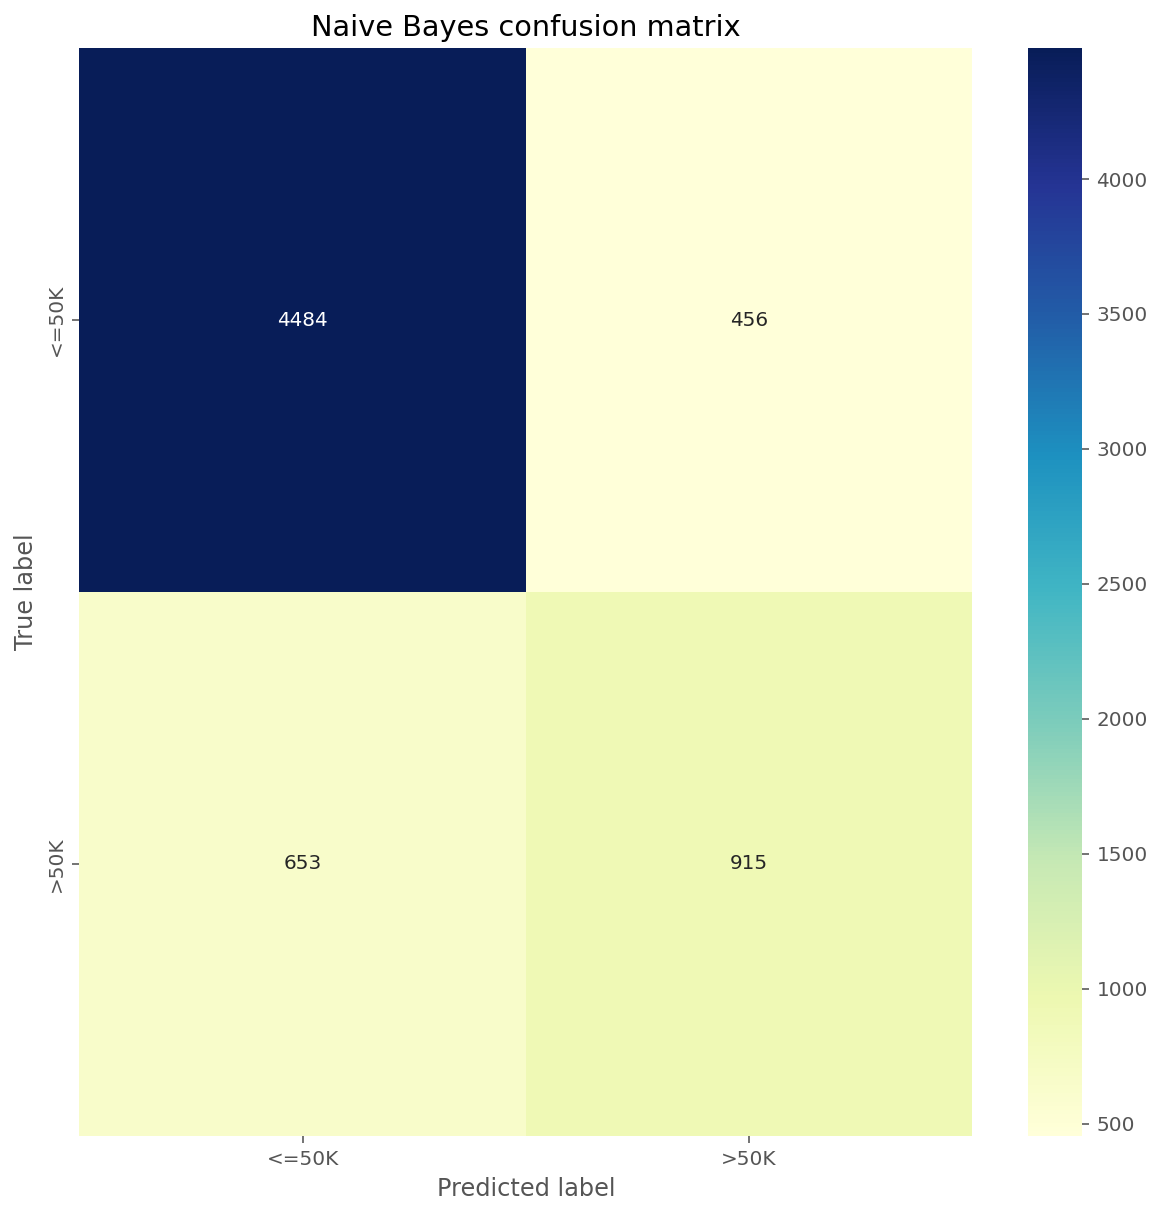

In [225]:
cm = confusion_matrix(y_test, y_pred_gnb)
cm_df = pd.DataFrame(cm, index = ['<=50K','>50K'], columns = ['<=50K','>50K'])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Naive Bayes confusion matrix")
plt.savefig('heatmap_NB_one-hot.png')
plt.show()

In [226]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4940
           1       0.67      0.58      0.62      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.75      0.76      6508
weighted avg       0.82      0.83      0.83      6508



# Trying with Ordinal Encoding instead of One-Hot for features

In [227]:
df2 = df.copy(); df2

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [229]:
from sklearn.preprocessing import LabelEncoder

for col in df2.columns:
    if df2[col].dtypes == 'object':
        print(col)
        encoder = LabelEncoder()
        df2[col] = encoder.fit_transform(df2[col])
        
df2

workclass
marital.status
occupation
relationship
race
sex
native.country


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,10,5,9,3,4,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,257302,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,154374,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,151910,9,6,0,4,4,0,0,0,40,38,0


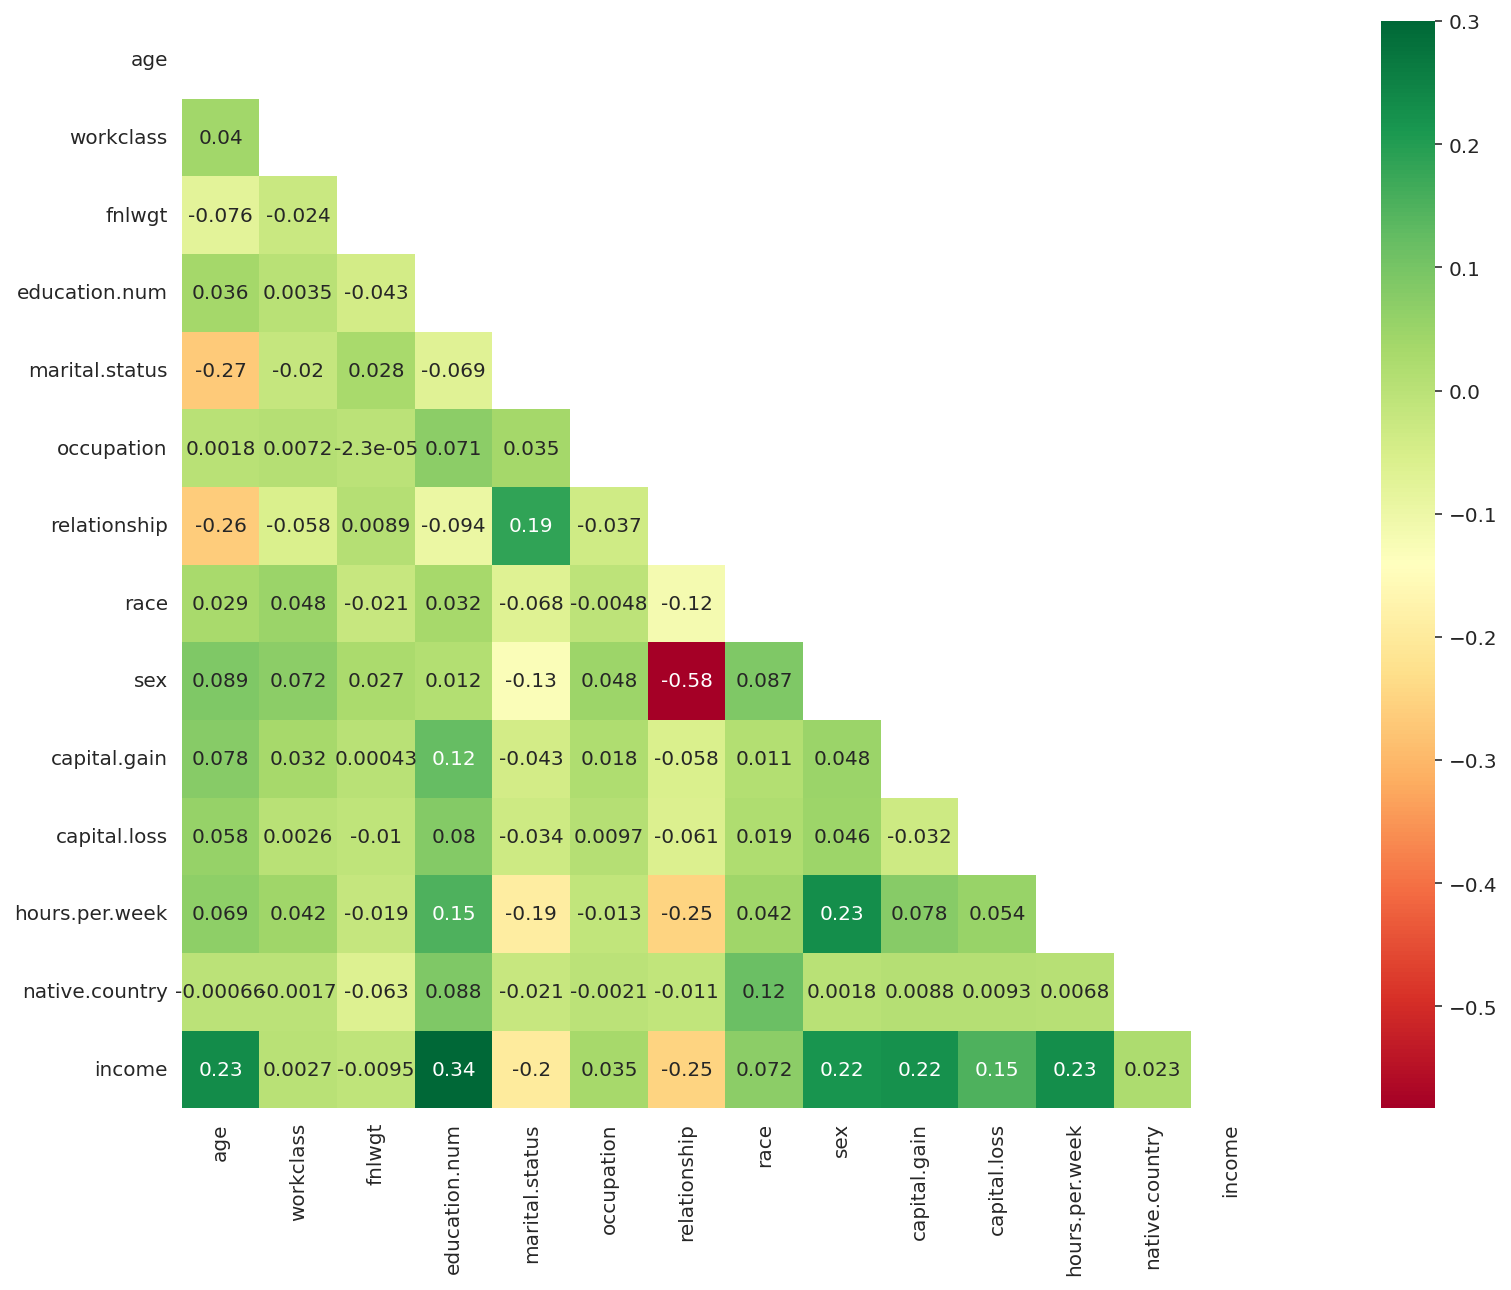

In [231]:
corr = df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi3.png')
plt.show()

In [232]:
X = df2.drop('income', axis=1)
y = df2['income']

In [233]:
selector = RandomForestClassifier(random_state=42)

selector.fit(X, y)
feature_imp = selector.feature_importances_
top10 = feature_imp.argsort()[::-1][:10]; top10
cols = X.columns[top10]; cols

Index(['fnlwgt', 'age', 'education.num', 'capital.gain', 'relationship',
       'hours.per.week', 'marital.status', 'occupation', 'capital.loss',
       'workclass'],
      dtype='object')

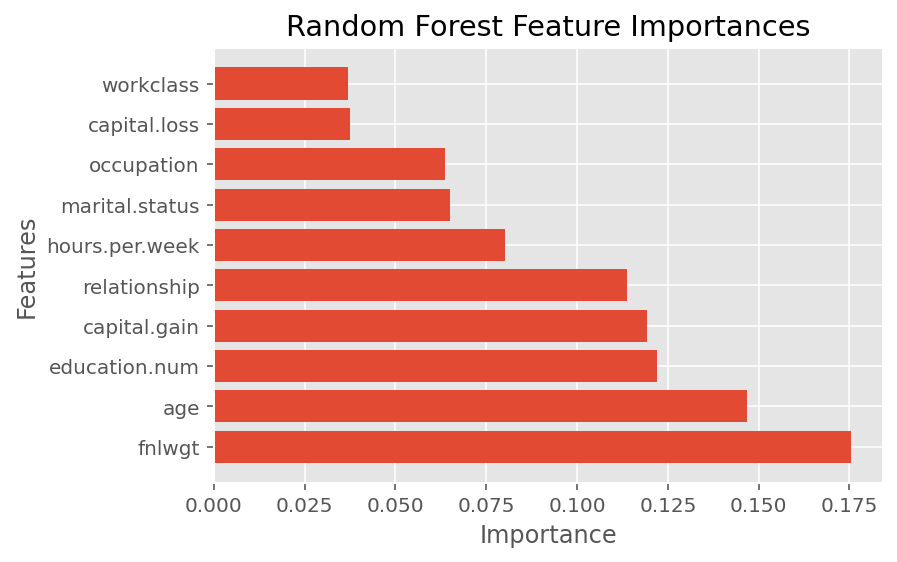

In [234]:
plot_imp(np.array(cols), feature_imp[top10], 'Random Forest')

In [235]:
cols = list(cols)
cols.append('income')

i_df2 = df2[cols]
i_df2

,fnlwgt,age,education.num,capital.gain,relationship,hours.per.week,marital.status,occupation,capital.loss,workclass,income
0,77053,90,9,0,1,40,6,9,4356,3,0
1,132870,82,9,0,1,18,6,3,4356,3,0
2,186061,66,10,0,4,40,6,9,4356,3,0
3,140359,54,4,0,4,40,0,6,3900,3,0
4,264663,41,10,0,3,40,5,9,3900,3,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,310152,22,10,0,1,40,4,10,0,3,0
32557,257302,27,12,0,5,38,2,12,0,3,0
32558,154374,40,9,0,0,40,2,6,0,3,1
32559,151910,58,9,0,4,40,6,0,0,3,0


In [236]:
train_df, test_df = train_test_split(i_df2, test_size=0.2, random_state=42, stratify=i_df2['income'])

In [237]:
X_dev = train_df.drop('income', axis=1)
y_dev = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

In [238]:
scaler = MinMaxScaler()
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

In [239]:
gnb = GaussianNB()

gnb.fit(X_dev, y_dev)
gnb.score(X_test, y_test)

0.7964044253226797

In [240]:
smote = SMOTE(random_state=42)
gnb_pipe = imb_make_pipeline(smote, GaussianNB())

gnb_pipe.fit(X_dev, y_dev)
gnb_pipe.score(X_test, y_test)

0.803318992009834

In [241]:
ros = RandomOverSampler(random_state=42)
gnb_pipe2 = imb_make_pipeline(ros, GaussianNB())

gnb_pipe2.fit(X_dev, y_dev)
gnb_pipe2.score(X_test, y_test)

0.8028580208973571

In [242]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)
rf_best.fit(X_dev, y_dev)
rf_best.score(X_test, y_test)

0.852181929932391

In [243]:
print('Random Forest Classifier:')
y_pred = rf_best.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred) * 100, 2))

Random Forest Classifier:
Accuracy score: 85.22
F1 score: 66.39


In [244]:
print('Naive Bayes Classifier:')
y_pred_gnb = gnb_pipe.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gnb) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_gnb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 80.33
F1 score: 46.93


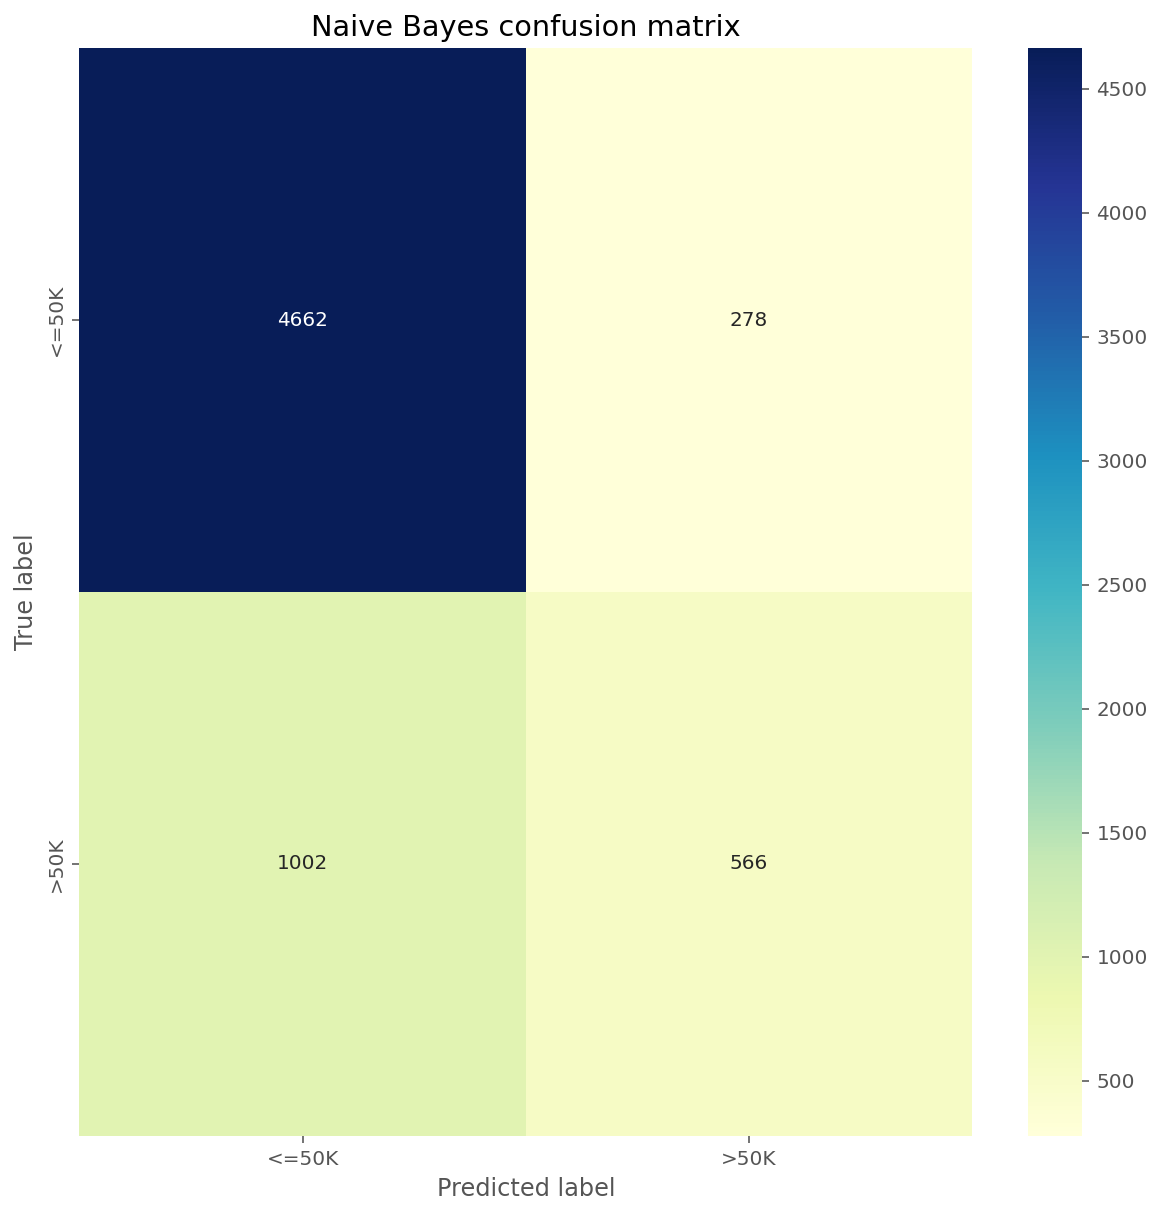

In [245]:
cm = confusion_matrix(y_test, y_pred_gnb)
cm_df = pd.DataFrame(cm, index = ['<=50K','>50K'], columns = ['<=50K','>50K'])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Naive Bayes confusion matrix")
plt.savefig('heatmap_NB_ordinal.png')
plt.show()

In [246]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4940
           1       0.67      0.36      0.47      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.65      0.67      6508
weighted avg       0.79      0.80      0.78      6508



We can see that ordinal encoding does not work as well for these features, which is expected since most of the features don't have an ordered heirarchy like the 'education' category. The F1-score with ordinal encoding was 0.47 and the F1-score with one-hot encoding was 0.62. This is evident due to the confusion in labeling positive samples correctly.